# 타이타닉 생존 예측

## 라이브러리 import하기

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 타이타닉 탑승자 파일 read_csv

In [41]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Column 정보 확인

In [42]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())

"""
row : 891개, column 12개
1. 'Age', 'Carbing', 'Embarked' 행에서 Null값 존재 확인 -> Null값 처리해야 함
2. 'Name', 'Sex', 'Ticket' 행은 Stirng type(==object type)으로 문자열 feature에 대한 처리를 해야 함
    pandas는 numpy 기반으로 만들어졌고 numpy의 String type 길이 제한이 있어 이에 대한 구분을 위해 object type으로 명기함.
    따라서 pandas의 object type은 String type으로 봐도 무방.
"""



 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


"\nrow : 891개, column 12개\n1. 'Age', 'Carbing', 'Embarked' 행에서 Null값 존재 확인 -> Null값 처리해야 함\n2. 'Name', 'Sex', 'Ticket' 행은 Stirng type(==object type)으로 문자열 feature에 대한 처리를 해야 함\n    pandas는 numpy 기반으로 만들어졌고 numpy의 String type 길이 제한이 있어 이에 대한 구분을 위해 object type으로 명기함.\n    따라서 pandas의 object type은 String type으로 봐도 무방.\n"

## Null값(결측치) 처리
사이킷런 머신러닝 알고리즘은 Null값을 허용하지 않으므로 Null값을 처리해야 한다. <br>
fillna() 함수를 사용하여 Null값을 평균 또는 고정값으로 변경하겠다.

In [43]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print("데이터 세트 Null값 개수 : ", titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 :  0


## String type Feature 처리

In [44]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

''' 
'Sex', 'Embarked' 값은 문제가 없으나,

Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않은 것 같다.
예를 들어 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin값이 4건이나 된다.

Cabin의 경우, 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다.

왜냐하면 이 시절에는 부자와 가난한 사람들에 대한 차별이 있던 시절이었기에 
일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것.

따라서 Cabin 속성의 앞 문자만 추출하는 작업 필요.
'''

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


" \n'Sex', 'Embarked' 값은 문제가 없으나,\n\nCabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않은 것 같다.\n예를 들어 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin값이 4건이나 된다.\n\nCabin의 경우, 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다.\n\n왜냐하면 이 시절에는 부자와 가난한 사람들에 대한 차별이 있던 시절이었기에 \n일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것.\n\n따라서 Cabin 속성의 앞 문자만 추출하는 작업 필요.\n"

In [45]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

## 성별에 따른 생존자 수 비교

여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상이었고, <br>
아마도 부자나 유명인이 다음 구조 대상이었을 것이다. <br>
삼등실에 탄 많은 가난한 청년들은 타이타닉 호와 운명을 함께 했을 것.. <br>
<br>
성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수 비교 필요.

In [46]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

# Survived 0 : 사망
# Survived 1 : 생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

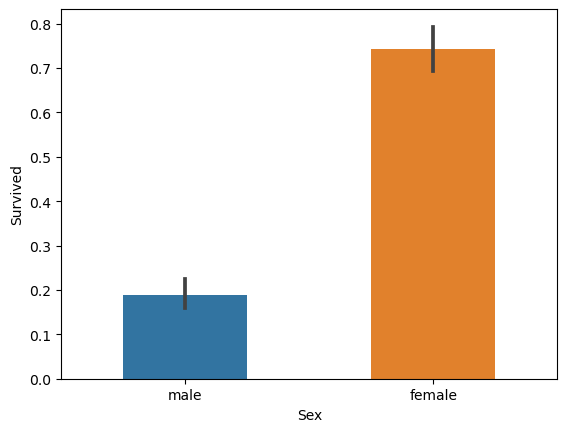

In [47]:
sns.barplot(x='Sex', y='Survived', data=titanic_df, width=0.5);

# 탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많았다
# 여자는 314명 중 233명으로 74.2% 생존.
# 남자는 577명 중 109명으로 18.8% 생존.

## 부에 따른 생존자 수 비교

' \nfemale의 경우\n    일, 이등실에 따른 생존 확률의 차이는 크지 않으나,\n    삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐\nmale의 경우\n    일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높다.\n'

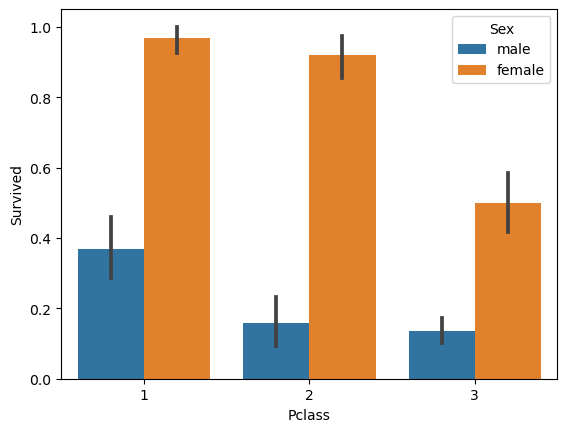

In [48]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

''' 
female의 경우
    일, 이등실에 따른 생존 확률의 차이는 크지 않으나,
    삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐
male의 경우
    일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높다.
'''

## 나이에 따른 생존자 수 비교

Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당. <br>

* 0~5세 : Baby
* 6~12세 : Child
* 13~18세 : Teenager
* 19~25세 : Student
* 26~35세 : Young Adult
* 36~60세 : Adult
* 61~ : Elderly


In [49]:
def get_age_category(age) :
    cat = ''
    if age <= -1 : cat='Unknown' # 오류값 처리
    elif age <= 5 : cat='Baby'  
    elif age <= 12 : cat='Child'
    elif age <= 18 : cat='Teenager'
    elif age <= 25 : cat='Student'
    elif age <= 35 : cat='Young Adult'
    elif age <= 60 : cat='Adult'
    else : cat='Elderly'

    return cat

' \n여자 Baby의 경우 비교적 생존 확률이 높음\n여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮음\n여자 Elderly의 경우 생존 확률이 매우 높음\n'

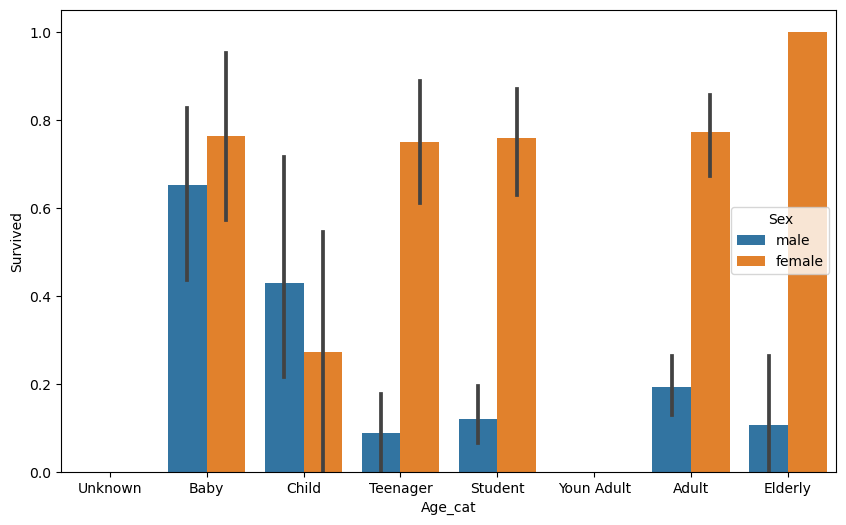

In [50]:
plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Youn Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(get_age_category)
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

''' 
여자 Baby의 경우 비교적 생존 확률이 높음
여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮음
여자 Elderly의 경우 생존 확률이 매우 높음
'''

## Feature 변환(Encoding)

이제 남아있는 문자열 카테고리 feature를 수치형 카테고리 feature로 변환.

인코딩은 sckilearn의 LabelEncoder 클래스를 이용해 레이블 인코딩을 적용.
LabelEncoder 객체는 카테고리 값의 유형 수에 따라, `0 ~ (카테고리 유형 수-1)`까지의 숫자 값으로 변환해준다.

In [51]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head() # 'Cabin', 'Sex', 'Embarekd' 속성이 숫자형으로 바뀐 것을 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## Feature 가공 & Data 전처리

* Null 처리
* 불필요한 feature 제거
* encoding

In [56]:
# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# ML Algorithm에 불필요한 Feature 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 데이터 전처리 함수 호출
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [57]:
# 만들어진 transform_features() 함수를 이용해 다시 원본 데이터 가공
# Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만들고,
# Survived 속성을 drop해 feature data set을 만든다.
# 이렇게 생성된 feature data set에 transform_features()를 적용해 데이터를 가공

# 원본 데이터 재로딩, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [59]:
# 내려받은 학습 데이터 세트를 기반으로 별도의 테스트 데이터 세트 추출.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

## 3개의 ML Algorithm을 이용한 생존자 예측

In [63]:
# 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Foreset, 로지스틱 회귀를 위한 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도 : {0:.4f}" .format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 : {0:.4f}" .format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도 : {0:.4f}" .format(accuracy_score(y_test, lr_pred)))

'''
3개의 알고리즘 중 LogisticRegression이 비교적 높은 정확도를 나타낸다.

아직 최적화 작업을 수행하지 않았고, 데이터양도 충분하지 않기 때문에 
어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다.
'''

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


/Users/ihyeongseob/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'\n3개의 알고리즘 중 LogisticRegression이 비교적 높은 정확도를 나타낸다.\n\n아직 최적화 작업을 수행하지 않았고, 데이터양도 충분하지 않기 때문에 \n어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다.\n'

## 결정 트리 모델에 대한 교차 검증

* KFold (폴드 개수 5개)
* cross_val_score()
* GridSearchCV

### KFold (폴드 개수 5개)

In [64]:
from sklearn.model_selection import KFold

def exec_kfold(clf, fold=5) :
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=fold)
    scores = []

    # KFold 교차 검증 수행
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    for iter, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy= accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}" .format(iter, accuracy))
    
    # 5개 fold의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {0: .4f}" .format(mean_score))

exec_kfold(dt_clf, fold=5)


교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 :  0.7823


### cross_val_score()

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter, accuracy in enumerate(scores) :
    print("교차 검증 {0} 정확도 : {1:.4f}" .format(iter, accuracy))

print("평균 정확도 : {0: .4f}" .format(np.mean(scores)))

# KFold와의 평균 정확도가 다른데, 
# 이는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 :  0.7879


### GridSearchCV

GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고, 예측 성능 측정

In [69]:
from sklearn.model_selection import GridSearchCV

parameters= {
    'max_depth' : [2, 3, 5, 10],
    'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1, 5, 8]
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 : {0: .4f}" .format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼  파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)

accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서 DecisionTreeClassifier 정확도 : {0: .4f}" .format(accuracy))

# 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2로 DecisionTreeClassifier를 학습시킨 뒤
# 예측 정확도가 87.15%로 향상되었다.
# 하이퍼 파라미터 변경 전보다 약 8% 시앙이 증가했는데, 일반적으로 하이퍼 파라미터 튜닝을 하더라고 이 정도로 증가하기는 어렵다
# 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보인다


GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.7992
테스트 세트에서 DecisionTreeClassifier 정확도 :  0.8715
